In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
df.shape

(20640, 10)

In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(20433, 10)

In [10]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


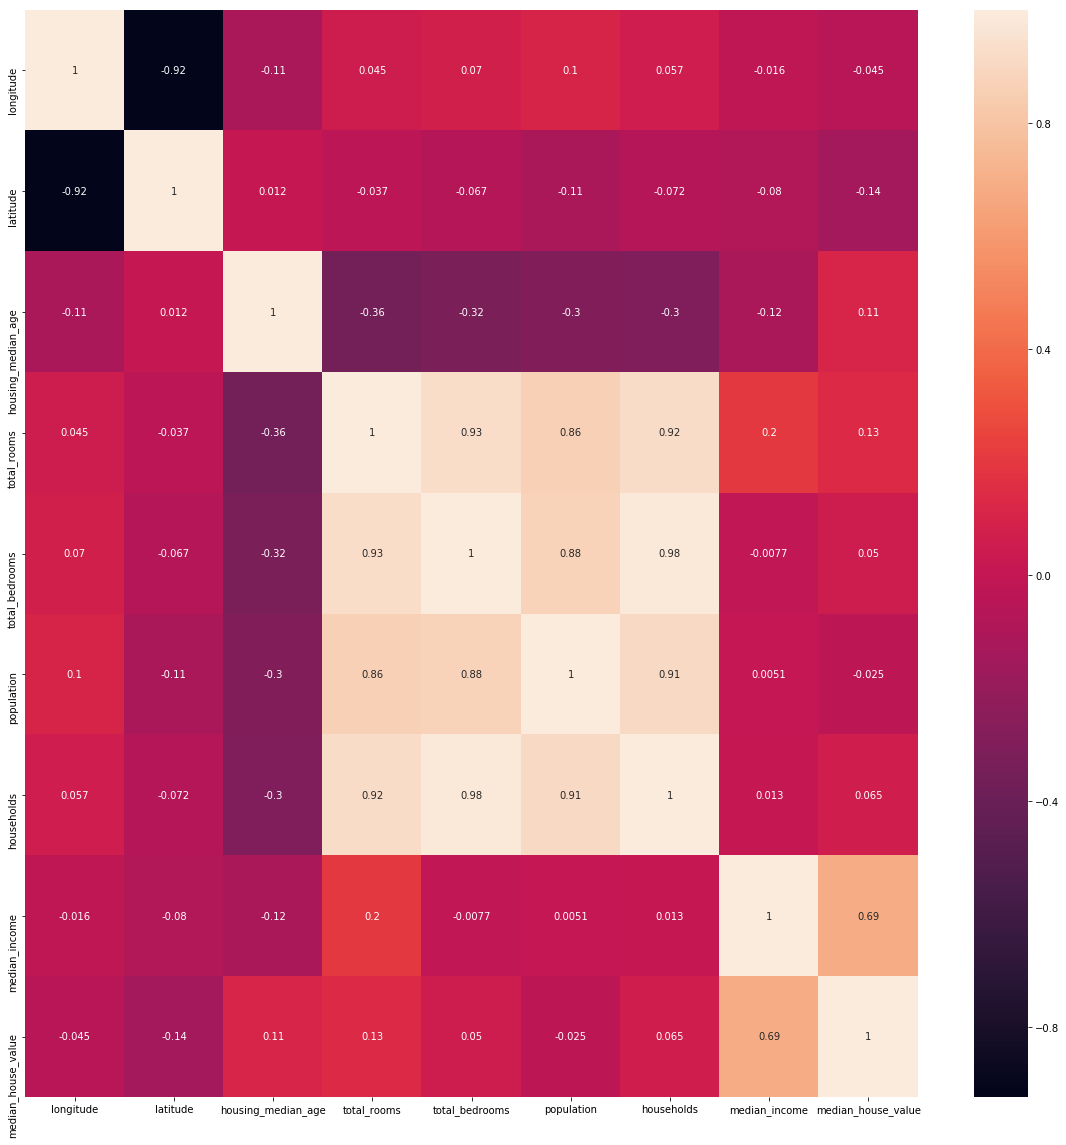

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [12]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('float64'): Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value'],
       dtype='object'), dtype('O'): Index(['ocean_proximity'], dtype='object')}

In [13]:
df_int=df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value']]

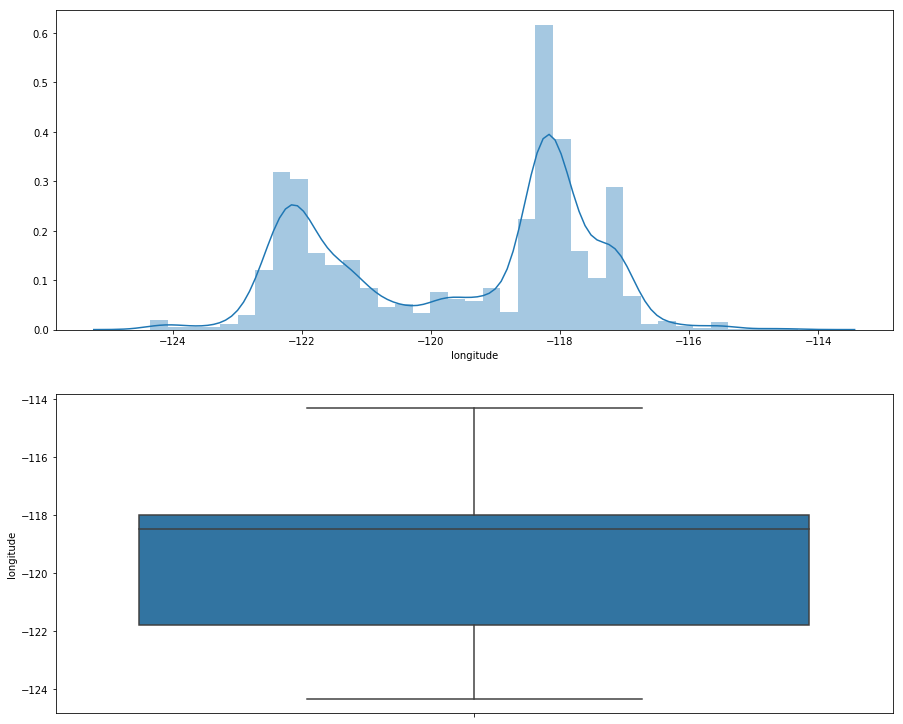

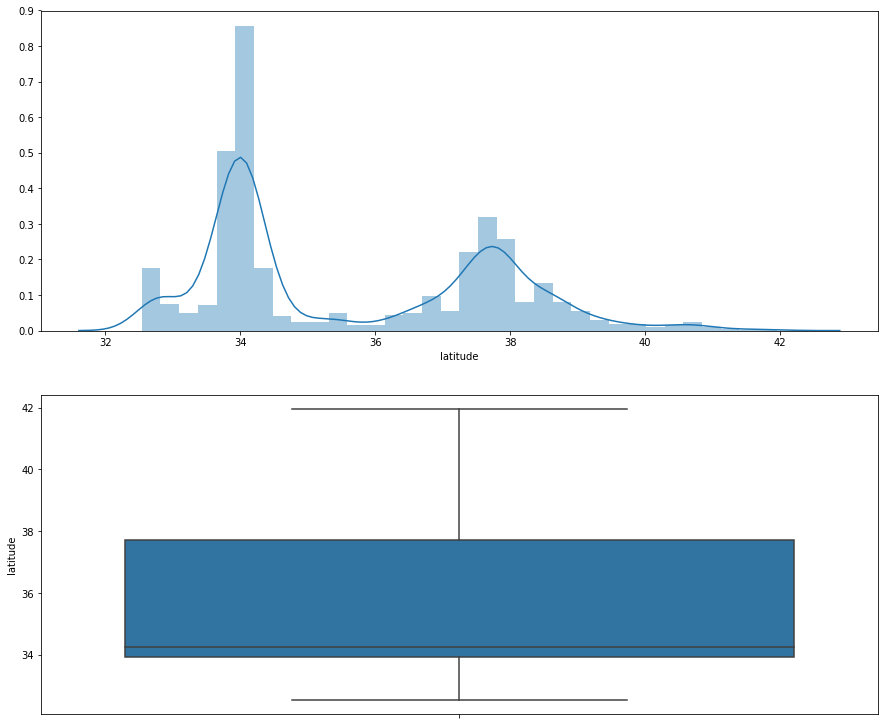

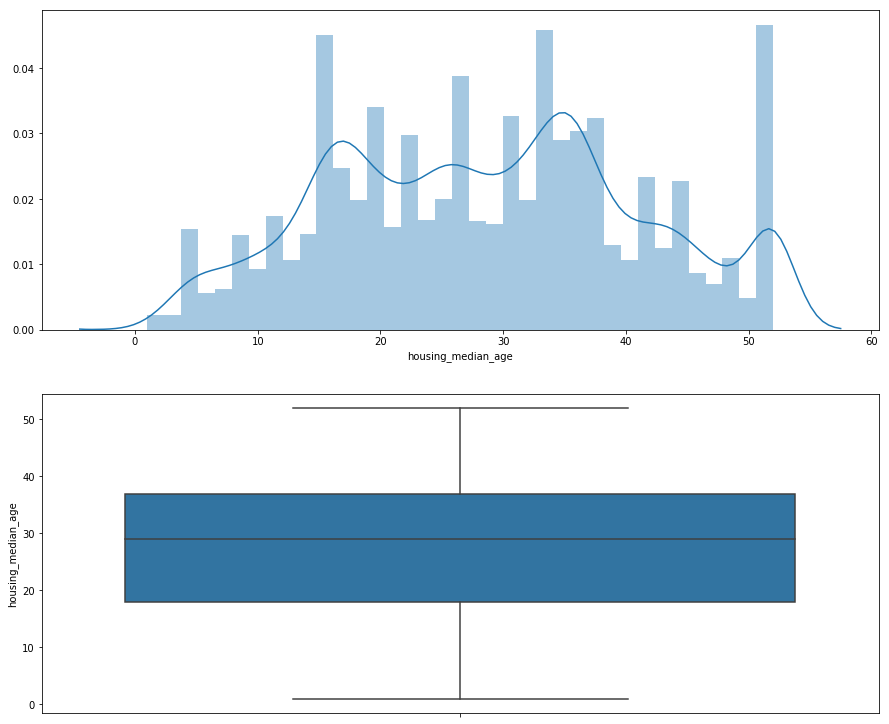

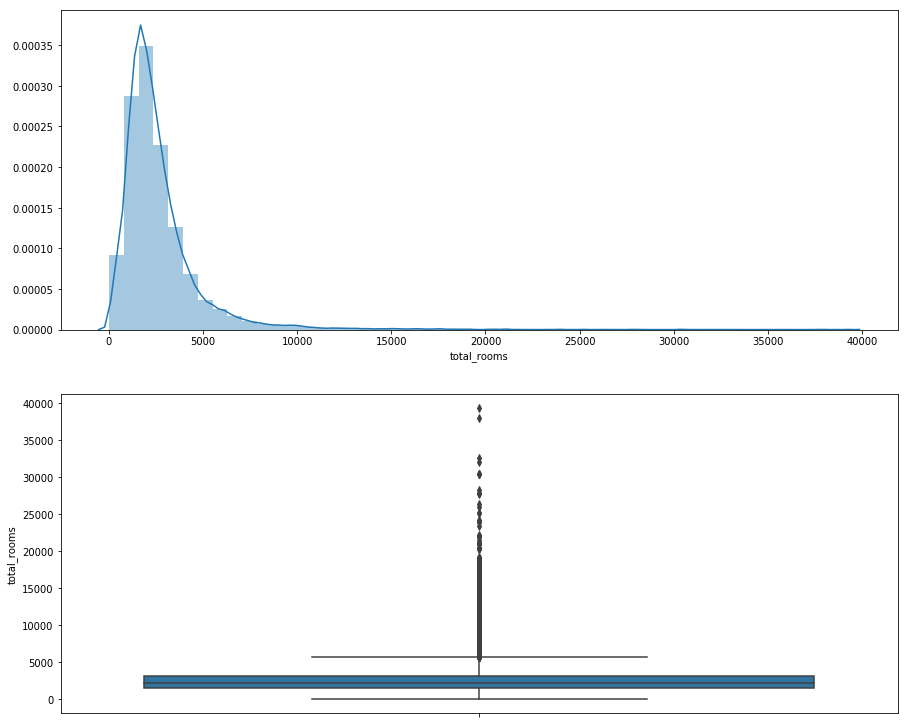

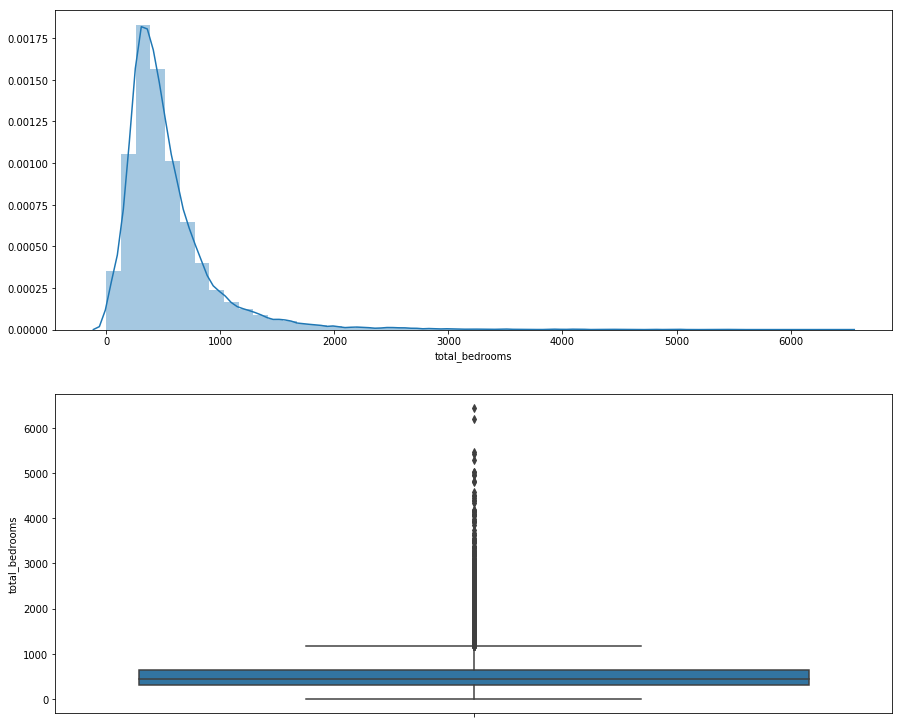

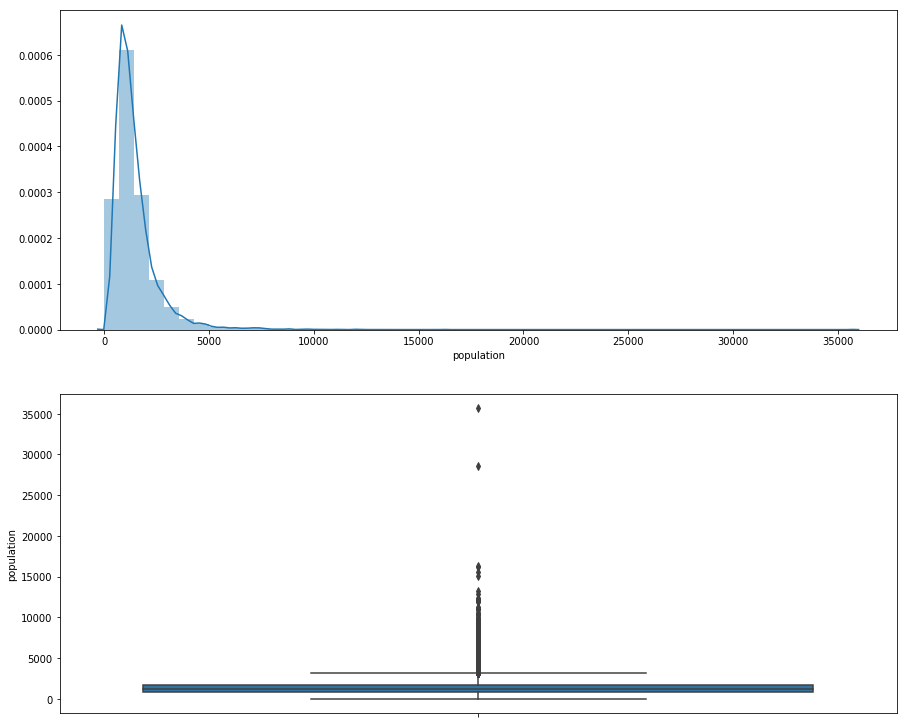

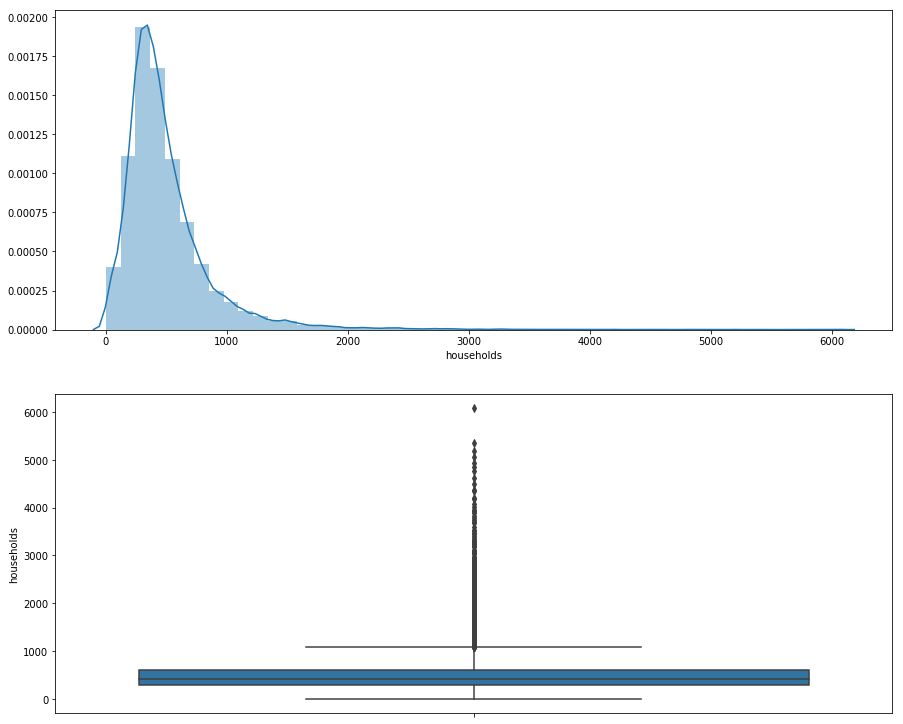

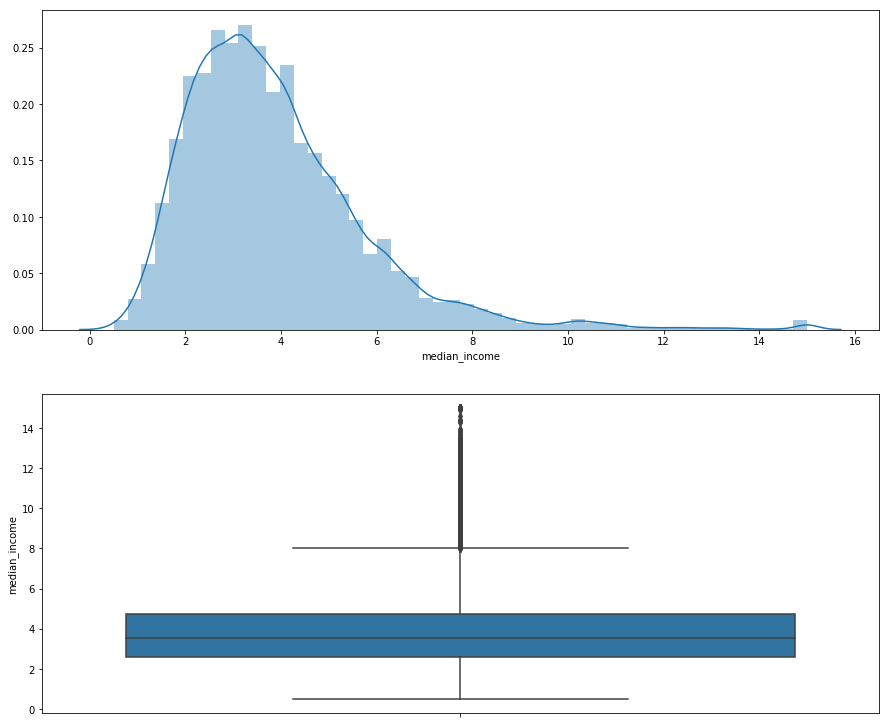

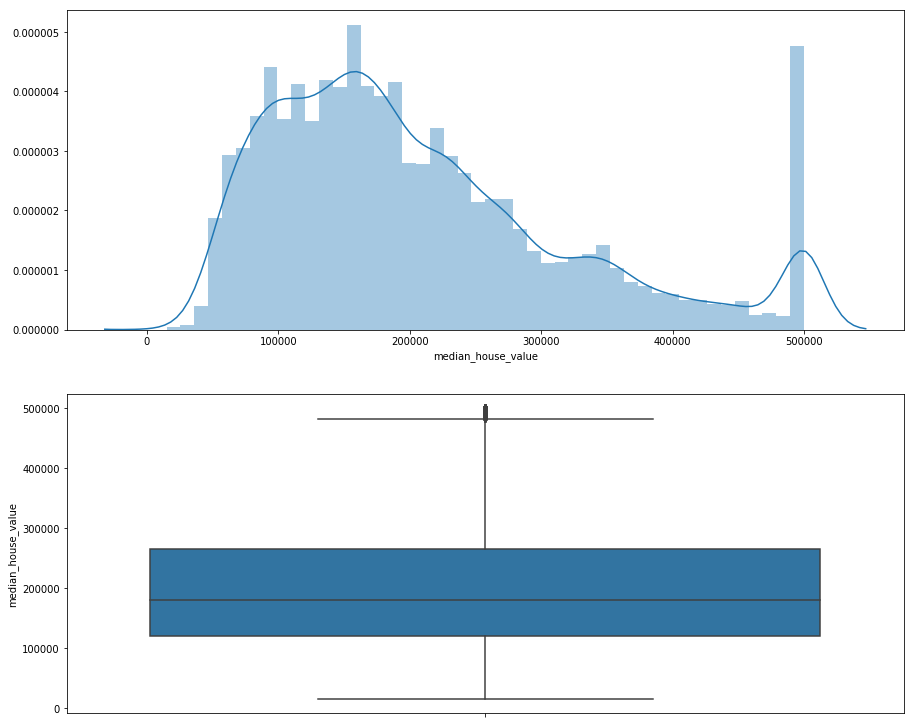

In [14]:
for i in df_int:
    plt.figure(figsize=(15,20))
    plt.subplot(311)
    sns.distplot(df[i])
    plt.subplot(312)
    sns.boxplot(df[i],orient='v')

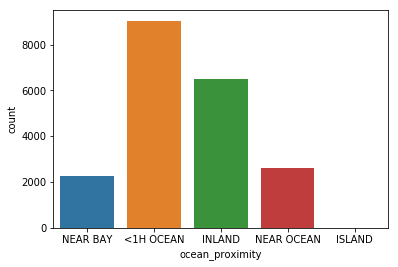

In [15]:
sns.countplot(df['ocean_proximity'])

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['ocean_proximity']=le.fit_transform(df['ocean_proximity'])

In [17]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [18]:
x=df.drop(['median_house_value'],axis=1)
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3


In [19]:
x.shape

(20433, 9)

In [20]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [21]:
from scipy.stats import boxcox
df['median_house_value']=boxcox(df['median_house_value'],0)

In [22]:
y=df['median_house_value']
y.head()

0    13.022764
1    12.789684
2    12.771671
3    12.740517
4    12.743151
Name: median_house_value, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=56)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

In [25]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
EN=ElasticNet()
DTR=DecisionTreeRegressor(random_state=23)
KNR=KNeighborsRegressor()
ABR=AdaBoostRegressor(random_state=23)
RFR=RandomForestRegressor(random_state=23)
GBR=GradientBoostingRegressor(random_state=23)
XGR=XGBRegressor(random_state=23)

In [26]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('XGBRegressor',XGR))

In [27]:
from sklearn.metrics import r2_score,mean_squared_error

In [28]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
for name,model in models:
    print('*********************************',name,'*********************************')
    print('\n',model)
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pre)
    print("Mean_Squared_Error =",mse)
    MSE.append(mse)
    score= cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')

********************************* LinearRegression *********************************

 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
R2_score =  0.6324832914206484
Mean_Squared_Error = 0.12023567823994723
Cross_Val_Score =  0.5217613798258811


********************************* Lasso *********************************

 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  -0.00045640687906445265
Mean_Squared_Error = 0.3273063559357402
Cross_Val_Score =  -0.31153192504574584


********************************* Ridge *********************************

 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
R2_score =  0.6324870028662049
Mean_Squared_Error = 0.12023446401440782
Cross_Val_Score =  0.5217758662744691


*********

In [29]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Cross_val_score
0,LinearRegression,0.632483,0.120236,0.521761
1,Lasso,-0.000456,0.327306,-0.311532
2,Ridge,0.632487,0.120234,0.521776
3,ElasticNet,-0.000456,0.327306,-0.311532
4,DecisionTreeRegressor,0.662975,0.110260,0.216664
5,KNeighborsRegressor,0.751238,0.081384,0.540556
6,AdaBoostRegressor,0.574193,0.139306,0.369553
7,RandomForestRegressor,0.810880,0.061872,0.531059
8,GradientBoostingRegressor,0.782836,0.071047,0.618614
9,XGBRegressor,0.775022,0.073603,0.607568


**Finding best Hyperparameter for RandomForestRegressor**

In [30]:
from sklearn.model_selection import GridSearchCV
parameterRFR = { 
            "n_estimators"      : [10,20,30,40,50,70,90,100,150,200],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }
gridRFR = GridSearchCV(RFR, param_grid=parameterRFR, n_jobs=-1, cv=10)
gridRFR.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=23, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [10, 20, 30, 40, 50, 70, 90, 100, 150, 200], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [2, 4, 8], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [31]:
gridRFR.best_score_ , gridRFR.best_params_

(0.8366485134162195,
 {'bootstrap': False,
  'max_features': 'sqrt',
  'min_samples_split': 4,
  'n_estimators': 200})

In [32]:
RFR=RandomForestRegressor(bootstrap = False,
  max_features = 'sqrt',
  min_samples_split = 4,
  n_estimators = 200)
score=cross_val_score(RFR,x,y,cv=10,scoring='r2').mean()

In [33]:
score

0.6122398275834676

**Finding best Hyperparameter for GradientBoostingRegressor**

In [34]:
parameterGBR={'n_estimators':[100,500], 
            'learning_rate': [0.1,0.05,0.02],
            'max_depth':[4], 
            'min_samples_leaf':[3], 
            'max_features':[1.0] 
            } 
gridGBR = GridSearchCV(GBR, param_grid=parameterGBR, n_jobs=-1, cv=10)
gridGBR.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...te=23, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 500], 'learning_rate': [0.1, 0.05, 0.02], 'max_depth': [4], 'min_samples_leaf': [3], 'max_features': [1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [35]:
gridGBR.best_score_ , gridGBR.best_params_

(0.8385573520669902,
 {'learning_rate': 0.1,
  'max_depth': 4,
  'max_features': 1.0,
  'min_samples_leaf': 3,
  'n_estimators': 500})

In [36]:
GBR=GradientBoostingRegressor(learning_rate= 0.1,
  max_depth= 4,
  max_features= 1.0,
  min_samples_leaf= 3,
  n_estimators= 500,random_state=23)
score=cross_val_score(GBR,x,y,cv=10,scoring='r2').mean()

In [37]:
score

0.6293818923878318

**Finding best Hyperparameter for XGBRegressor**

In [38]:
parameterXG = {'learning_rate': [.03, 0.05,.06, .07,.08], 
              'max_depth': [4,5,6],
              'min_child_weight': [4,6,2],
              'colsample_bytree': [0.7],
              'n_estimators': [100,250,400,500]
            }
gridXG = GridSearchCV(XGR, param_grid=parameterXG, n_jobs=-1, cv=10)
gridXG.fit(x_train, y_train)

[16:27:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=23,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [0.03, 0.05, 0.06, 0.07, 0.08], 'max_depth': [4, 5, 6], 'min_child_weight': [4, 6, 2], 'colsample_bytree': [0.7], 'n_estimators': [100, 250, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [39]:
gridXG.best_score_ , gridXG.best_params_

(0.8489677004001587,
 {'colsample_bytree': 0.7,
  'learning_rate': 0.07,
  'max_depth': 6,
  'min_child_weight': 2,
  'n_estimators': 500})

In [40]:
XGR=XGBRegressor(colsample_bytree= 0.7,
  learning_rate= 0.07,
  max_depth= 6,
  min_child_weight = 2,
  n_estimators= 500)
score=cross_val_score(XGR,x,y,cv=10,scoring='r2').mean()

[16:29:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:29:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:29:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:30:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:30:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:30:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:30:53] WARNI

In [41]:
score

0.6215155126538845

**After tuning the model I get cross_val_score=0.6293 and r2_SCORE=0.8385 through GradientBoostingRegressor**

In [43]:
RFR.fit(x_train,y_train)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [44]:
from sklearn.externals import joblib
joblib.dump(RFR,"model_CaliforniaHouse.csv")

['model_CaliforniaHouse.csv']

In [45]:
model=joblib.load('model_CaliforniaHouse.csv')

In [46]:
model.predict(x_test)

array([11.84528164, 12.44920496, 11.90689012, ..., 12.3836535 ,
       12.17945103, 12.24965206])